**Методы классификации недостоверных новостных сообщений.**

*Силина Полина*

**Логистическая регрессия с предобработкой текстов алгоритмом лемматизации Портера.**

##0. Подключение к диску

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


##1. Чтение данных из файла

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
# Выбираем этап 5, где тексты уже предобработанны алгоритмом лемматизации Портера
data = pd.read_csv('gdrive/My Drive/NewsProject/Data/PreparedData/PreparedData_Version_00/step5.csv', sep=";", header=[0], encoding='Cp1251')
data.rename(columns={"Unnamed: 5" : "IsBroken"}, inplace=True)# На случай, если какие-то данные повредились

need_to_del = ['интерфакс', 'панорам']
for word in need_to_del:
      data['Text'] = data['Text'].str.replace(word, "")
data.head()

,Site,Heading,Text,Value,Type,IsBroken
0,https://www.interfax.ru/business/683812,Данные о 5 тысячах вкладчиков ВТБ утекли в инт...,интернет появ информац продаж дан тысяч вкладч...,True,Business,NaN
1,https://www.interfax.ru/business/683806,Рубль вечером чуть сократил темпы снижения к д...,доллар евр немн укрепля московск бирж понедель...,True,Business,NaN
2,https://www.interfax.ru/business/683807,Alibaba установила рекорд продаж в День холост...,китайск компан установ нов рекорд продаж ден о...,True,Business,NaN
3,https://www.interfax.ru/business/683805,Рынок акций начал неделю со снижения на опасен...,рынок акц рф нача недел снижен миров площадк и...,True,Business,NaN
4,https://www.interfax.ru/business/683768,Венесуэла начала продавать нефть по сниженным ...,венесуэл вынужд продава нефт снижен цен поскол...,True,Business,NaN


##2. Подготовка данных

In [ ]:
from nltk.tokenize import RegexpTokenizer

tokenizer = RegexpTokenizer(r'\w+')

In [ ]:
tokenized_texts = []
for i in range(len(data["Text"])):
  try:
    print(i)
    tokenized_texts.append(tokenizer.tokenize(data["Text"][i]))
    data["IsBroken"][i] = 0
  except TypeError:
      print("Broken")
      data["IsBroken"][i] = 1
      pass

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277
278
279
280
281
282
283
284
285
286
287
288
289
290
291
292
293
294
295
296
297
298
299
300
301
302
303
304
305
306
307
308
309
310
311
312
313
314
315
316
317
318
319
320
321
322
323
324
325
326
327
328
329
330
331
332
333
334
335
336
337
338
339
340
341
342
343
344
345
346
347
348
349
350
351
352
353
354
355
356
357
358
359
360
361
362
363
364
365
366
367
368
369
370
371
372
373
374
375
376
377
378
379
380
381
382
383
384
385
386
387
388
389
390
391
392
393
394
395
396
397
398
399
400
401
402
403
404
405
406
407
408
409
410
411
412
413
414
415
416
417
418
419
420
421
422
423
424
425
426
427
428
429
430
431
432
433
434
435
436
437
438
439
440
441
442
443
444
445
446
447
448
449
450
451
452
453
454
455
456
457
458
459
460
461
462
463
464
465
466
467
468
469
470
471
472
473
474
475
476
477
478
479
480
481
482
483
484
485
486
487
488
489
490
491
492
493
494
495
496
497
498
499
500
501
502
503
504
505
506
507
508
509
510
511


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


3567
3568
3569
3570
3571
3572
3573
3574
3575
3576
3577
3578
3579
3580
3581
3582
3583
3584
3585
3586
3587
3588
3589
3590
3591
3592
3593
3594
3595
3596
Broken
3597
3598
3599
3600
3601
3602
3603
Broken
3604
Broken
3605
3606
3607
Broken
3608
3609
3610
3611
3612
3613
3614
3615
3616
3617
3618
3619
3620
3621
3622
3623
3624
3625
3626
3627
3628
3629
3630
3631
3632
3633
3634
3635
3636
3637
3638
3639
3640
3641
3642
3643
3644
3645
3646
3647
3648
3649
3650
3651
3652
3653
3654
3655
3656
3657
3658
3659
3660
3661
3662
3663
3664
3665
3666
3667
3668
3669
3670
3671
3672
3673
3674
3675
3676
3677
3678
3679
3680
3681
3682
3683
3684
3685
3686
3687
3688
3689
3690
3691
3692
3693
3694
3695
Broken
3696
3697
Broken
3698
3699
Broken
3700
3701
3702
3703
3704
3705
3706
3707
3708
3709
3710
3711
3712
3713
3714
3715
3716
3717
3718
3719
3720
3721
3722
3723
3724
3725
3726
3727
3728
3729
3730
3731
3732
3733
3734
3735
3736
3737
3738
3739
3740
3741
3742
3743
3744
3745
3746
3747
3748
3749
3750
3751
3752
3753
3754
3755
3756
3

In [ ]:
data_prepared = data.drop(np.where(data["IsBroken"] == 1)[0])
del data_prepared["IsBroken"]
data_prepared['Value'].replace([False,True],[0,1],inplace=True)

data_prepared["Tokens"] = tokenized_texts

data_prepared.head()

,Site,Heading,Text,Value,Type,Tokens
0,https://www.interfax.ru/business/683812,Данные о 5 тысячах вкладчиков ВТБ утекли в инт...,интернет появ информац продаж дан тысяч вкладч...,1,Business,"[интернет, появ, информац, продаж, дан, тысяч,..."
1,https://www.interfax.ru/business/683806,Рубль вечером чуть сократил темпы снижения к д...,доллар евр немн укрепля московск бирж понедель...,1,Business,"[доллар, евр, немн, укрепля, московск, бирж, п..."
2,https://www.interfax.ru/business/683807,Alibaba установила рекорд продаж в День холост...,китайск компан установ нов рекорд продаж ден о...,1,Business,"[китайск, компан, установ, нов, рекорд, продаж..."
3,https://www.interfax.ru/business/683805,Рынок акций начал неделю со снижения на опасен...,рынок акц рф нача недел снижен миров площадк и...,1,Business,"[рынок, акц, рф, нача, недел, снижен, миров, п..."
4,https://www.interfax.ru/business/683768,Венесуэла начала продавать нефть по сниженным ...,венесуэл вынужд продава нефт снижен цен поскол...,1,Business,"[венесуэл, вынужд, продава, нефт, снижен, цен,..."


##3. Изучение данных

In [ ]:
data_prepared.groupby("Type").count()

,Site,Heading,Text,Value,Tokens
Type,,,,,
Books,5,5,5,5,5
Business,394,394,394,394,394
Culture,67,67,67,67,67
Economics,125,125,125,125,125
Politics,700,700,700,700,700
Russia,1356,1356,1356,1356,1356
Science,138,138,138,138,138
Society,1727,1727,1727,1727,1727
World,1064,1064,1064,1064,1064


In [ ]:
data_prepared.groupby("Value").count()

,Site,Heading,Text,Type,Tokens
Value,,,,,
0,2695,2695,2695,2695,2695
1,2881,2881,2881,2881,2881


In [ ]:
all_words = [word for tokens in data_prepared["Tokens"] for word in tokens]
sentence_lengths = [len(tokens) for tokens in data_prepared["Tokens"]]
VOCAB = sorted(list(set(all_words)))
print("%s слов, размер словаря - %s" % (len(all_words), len(VOCAB)))
print("Максимальная длина текста - %s" % max(sentence_lengths))

883038 слов, размер словаря - 24069
Максимальная длина текста - 2416


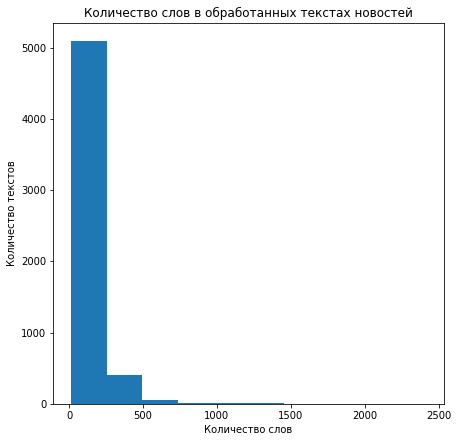

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(7, 7)) 
plt.xlabel('Количество слов')
plt.ylabel('Количество текстов')
plt.title('Количество слов в обработанных текстах новостей')
plt.hist(sentence_lengths)
plt.show()

##4. Подготовка векторного представления слов

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

def cv(data):
  count_vectorizer = CountVectorizer()
  emb = count_vectorizer.fit_transform(data)
  return emb, count_vectorizer

list_corpus = data_prepared["Text"].tolist()
list_labels = data_prepared["Value"].tolist()

X_train, X_test, y_train, y_test = train_test_split(list_corpus, list_labels, test_size=0.2, random_state=40)

X_train_counts, count_vectorizer = cv(X_train)
X_test_counts = count_vectorizer.transform(X_test)

##5. Визуализация векторных представлений

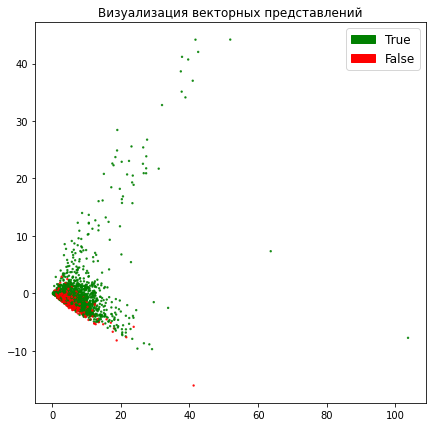

In [ ]:
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib
import matplotlib.patches as mpatches

def plot_LSA(test_data, test_labels, savepath="PCA_demo.csv", plot=True):
  lsa = TruncatedSVD(n_components=2)
  lsa.fit(test_data)
  lsa_scores = lsa.transform(test_data)
  
  color_mapper = {label:idx for idx,label in enumerate(set(test_labels))}
  color_column = [color_mapper[label] for label in test_labels]
  colors = ['red','green']
  if plot:
    plt.scatter(lsa_scores[:,0], lsa_scores[:,1], s=2, alpha=.8, c=test_labels, cmap=matplotlib.colors.ListedColormap(colors))
    green_patch = mpatches.Patch(color='green', label='True')
    red_patch = mpatches.Patch(color='red', label='False')
    plt.legend(handles=[green_patch, red_patch], prop={'size': 12})
    plt.title('Визуализация векторных представлений')

fig = plt.figure(figsize=(7, 7))          
plot_LSA(X_train_counts, y_train)
plt.show()

## 6. Логистическая регрессия

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
param_test = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
}
gsearch = GridSearchCV(estimator = LogisticRegression(), 
param_grid = param_test, n_jobs=-1, iid=False, cv=5)

In [ ]:
gsearch.fit(X_train_counts, y_train)
gsearch.best_params_

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


{'penalty': 'l2', 'solver': 'newton-cg'}

In [ ]:
clf = LogisticRegression(penalty= 'l2', solver= 'newton-cg')
clf.fit(X_train_counts, y_train)

y_predicted_counts = clf.predict(X_test_counts)

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report

def get_metrics(y_test, y_predicted):  
    # true positives / (true positives + false positives)
    precision = precision_score(y_test, y_predicted, pos_label=None, average='weighted')

    # true positives / (true positives + false negatives)
    recall = recall_score(y_test, y_predicted, pos_label=None, average='weighted')
    
    # harmonic mean of precision and recall
    f1 = f1_score(y_test, y_predicted, pos_label=None, average='weighted')
    
    # true positives + true negatives / total
    accuracy = accuracy_score(y_test, y_predicted)
    
    return accuracy, precision, recall, f1

accuracy, precision, recall, f1 = get_metrics(y_test, y_predicted_counts)
print("accuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f" % (accuracy, precision, recall, f1))

accuracy = 0.969, precision = 0.969, recall = 0.969, f1 = 0.969


##7. Исследование результата

In [ ]:
import numpy as np
import itertools
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.winter):
  if normalize:
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title, fontsize=30)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, fontsize=20)
  plt.yticks(tick_marks, classes, fontsize=20)
    
  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.

  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] < thresh else "black", fontsize=40)
    
  plt.tight_layout()
  plt.ylabel('True label', fontsize=30)
  plt.xlabel('Predicted label', fontsize=30)

  return plt

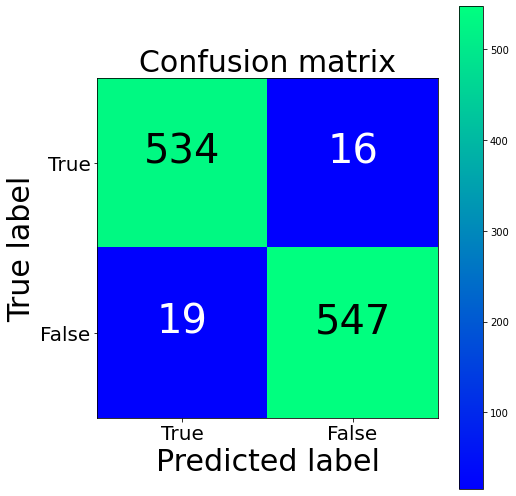

[[534  16]
 [ 19 547]]


In [ ]:
cm = confusion_matrix(y_test, y_predicted_counts, labels=[1, 0])
fig = plt.figure(figsize=(7, 7))
plot = plot_confusion_matrix(cm, classes=["True", "False"], normalize=False, title='Confusion matrix')
plt.show()
print(cm)

In [ ]:
def get_most_important_features(vectorizer, model, n=5):
  index_to_word = {v:k for k,v in vectorizer.vocabulary_.items()}
    
  # loop for each class
  classes ={}
  for class_index in range(model.coef_.shape[0]):
    word_importances = [(el, index_to_word[i]) for i,el in enumerate(model.coef_[class_index])]
    sorted_coeff = sorted(word_importances, key = lambda x : x[0], reverse=True)
    tops = sorted(sorted_coeff[:n], key = lambda x : x[0])
    bottom = sorted_coeff[-n:]
    classes[class_index] = {
      'tops':tops,
      'bottom':bottom
    }
  return classes

importance = get_most_important_features(count_vectorizer, clf, 10)

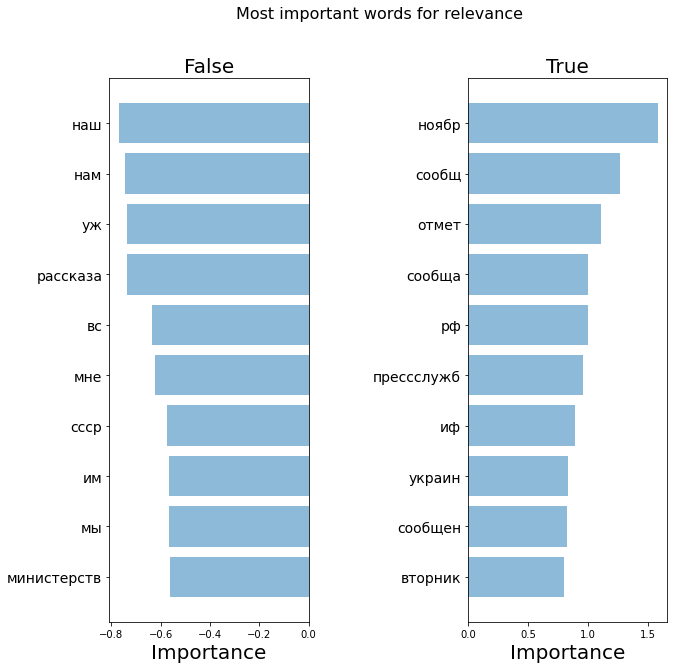

In [ ]:
def plot_important_words(top_scores, top_words, bottom_scores, bottom_words, name):
  y_pos = np.arange(len(top_words))
  top_pairs = [(a,b) for a,b in zip(top_words, top_scores)]
  top_pairs = sorted(top_pairs, key=lambda x: x[1])
    
  bottom_pairs = [(a,b) for a,b in zip(bottom_words, bottom_scores)]
  bottom_pairs = sorted(bottom_pairs, key=lambda x: x[1], reverse=True)
    
  top_words = [a[0] for a in top_pairs]
  top_scores = [a[1] for a in top_pairs]
    
  bottom_words = [a[0] for a in bottom_pairs]
  bottom_scores = [a[1] for a in bottom_pairs]
    
  fig = plt.figure(figsize=(10, 10))  

  plt.subplot(121)
  plt.barh(y_pos,bottom_scores, align='center', alpha=0.5)
  plt.title('False', fontsize=20)
  plt.yticks(y_pos, bottom_words, fontsize=14)
  plt.suptitle('Key words', fontsize=16)
  plt.xlabel('Importance', fontsize=20)

  plt.subplot(122)
  plt.barh(y_pos,top_scores, align='center', alpha=0.5)
  plt.title('True', fontsize=20)
  plt.yticks(y_pos, top_words, fontsize=14)
  plt.suptitle(name, fontsize=16)
  plt.xlabel('Importance', fontsize=20)
    
  plt.subplots_adjust(wspace=0.8)
  plt.show()

top_scores = [a[0] for a in importance[0]['tops']]
top_words = [a[1] for a in importance[0]['tops']]
bottom_scores = [a[0] for a in importance[0]['bottom']]
bottom_words = [a[1] for a in importance[0]['bottom']]

plot_important_words(top_scores, top_words, bottom_scores, bottom_words, "Most important words for relevance")

## 8. Сохранение первой модели

In [ ]:
# Обучаем на всем наборе данных

X_counts, count_vectorizer = cv(list_corpus)
X_test_counts = count_vectorizer.transform(X_test)

clf = LogisticRegression(penalty= 'l2', solver= 'newton-cg')
clf.fit(X_counts, list_labels)

y_predicted_counts = clf.predict(X_test_counts)

accuracy, precision, recall, f1 = get_metrics(y_test, y_predicted_counts)
print("accuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f" % (accuracy, precision, recall, f1))

accuracy = 1.000, precision = 1.000, recall = 1.000, f1 = 1.000


In [ ]:
import pickle
with open('gdrive/My Drive/NewsProject/Модели 2021/Файлы моделей/Логистическая регрессия (Портер)/LogisticRegression_Porter.pickle', 'wb') as f:
  pickle.dump(clf, f)

In [ ]:
import joblib
with open('gdrive/My Drive/NewsProject/Модели 2021/Файлы моделей/Логистическая регрессия (Портер)/Vectorize_LogisticRegression_Porter.pkl', 'wb') as f:
  joblib.dump(count_vectorizer, f) 

##9. TFIDF

In [ ]:
def tfidf(data):
  tfidf_vectorizer = TfidfVectorizer()
  train = tfidf_vectorizer.fit_transform(data)

  return train, tfidf_vectorizer

X_train_tfidf, tfidf_vectorizer = tfidf(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

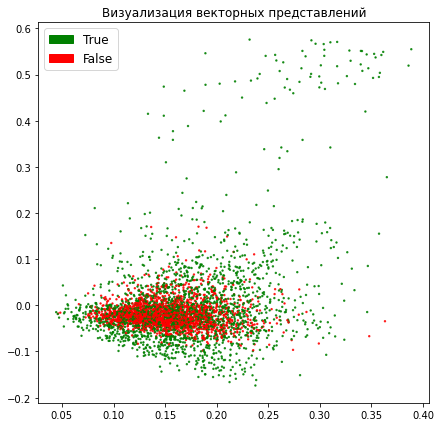

In [ ]:
fig = plt.figure(figsize=(7, 7))          
plot_LSA(X_train_tfidf, y_train)
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
param_test = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
}
gsearch_tfidf = GridSearchCV(estimator = LogisticRegression(), 
param_grid = param_test, n_jobs=-1, iid=False, cv=5)

In [ ]:
gsearch_tfidf.fit(X_train_tfidf, y_train)
gsearch_tfidf.best_params_

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


{'penalty': 'none', 'solver': 'newton-cg'}

In [ ]:
clf_tfidf = LogisticRegression(penalty= 'none', solver= 'newton-cg')
clf_tfidf.fit(X_train_tfidf, y_train)

y_predicted_tfidf = clf_tfidf.predict(X_test_tfidf)

In [ ]:
accuracy_tfidf, precision_tfidf, recall_tfidf, f1_tfidf = get_metrics(y_test, y_predicted_tfidf)
print("accuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f" % (accuracy_tfidf, precision_tfidf, recall_tfidf, f1_tfidf))

accuracy = 0.980, precision = 0.980, recall = 0.980, f1 = 0.980


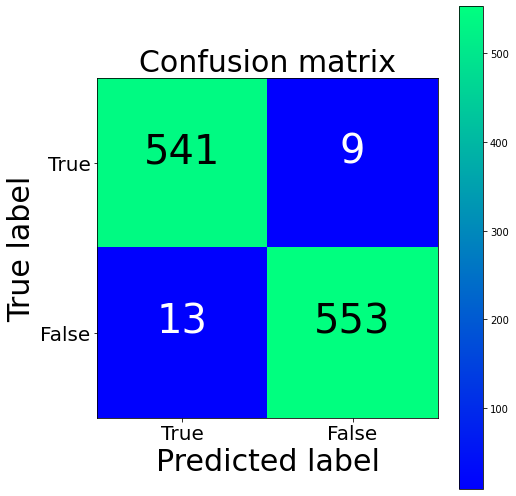

TFIDF confusion matrix
[[541   9]
 [ 13 553]]
BoW confusion matrix
[[534  16]
 [ 19 547]]


In [ ]:
cm2 = confusion_matrix(y_test, y_predicted_tfidf, labels=[1, 0])
fig = plt.figure(figsize=(7, 7))
plot = plot_confusion_matrix(cm2, classes=["True", "False"], normalize=False, title='Confusion matrix')
plt.show()
print("TFIDF confusion matrix")
print(cm2)
print("BoW confusion matrix")
print(cm)

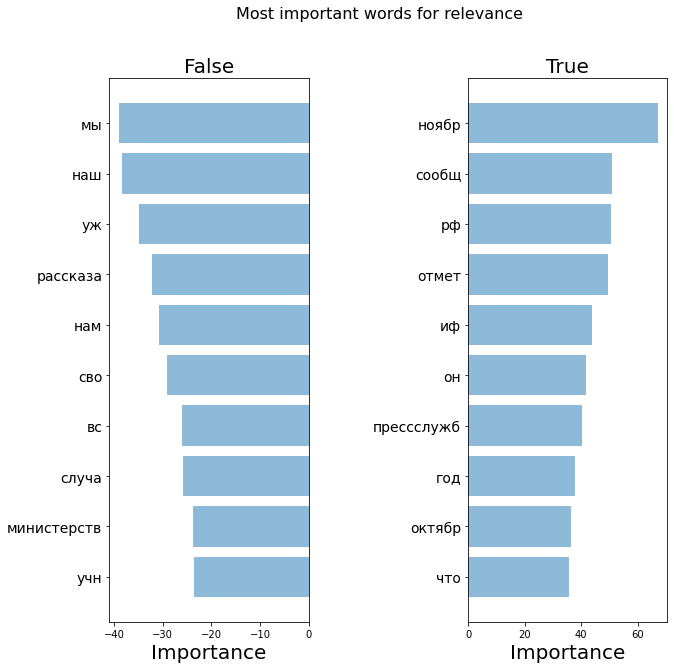

In [ ]:
importance_tfidf = get_most_important_features(tfidf_vectorizer, clf_tfidf, 10)

top_scores = [a[0] for a in importance_tfidf[0]['tops']]
top_words = [a[1] for a in importance_tfidf[0]['tops']]
bottom_scores = [a[0] for a in importance_tfidf[0]['bottom']]
bottom_words = [a[1] for a in importance_tfidf[0]['bottom']]

plot_important_words(top_scores, top_words, bottom_scores, bottom_words, "Most important words for relevance")

## 10. Сохранение второй модели

In [ ]:
# Обучаем на всем наборе данных

X_counts_tfidf, tfidf_vectorizer = tfidf(list_corpus)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

clf_tfidf = LogisticRegression(penalty= 'none', solver= 'newton-cg')
clf_tfidf.fit(X_counts_tfidf, list_labels)

y_predicted_counts = clf_tfidf.predict(X_test_tfidf)

accuracy, precision, recall, f1 = get_metrics(y_test, y_predicted_counts)
print("accuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f" % (accuracy, precision, recall, f1))

accuracy = 1.000, precision = 1.000, recall = 1.000, f1 = 1.000


In [ ]:
import pickle
with open('gdrive/My Drive/NewsProject/Модели 2021/Файлы моделей/Логистическая регрессия (Портер, TF-IDF)/LogisticRegression_Porter_TFIDF.pickle', 'wb') as f:
  pickle.dump(clf_tfidf, f)

In [ ]:
import joblib
with open('gdrive/My Drive/NewsProject/Модели 2021/Файлы моделей/Логистическая регрессия (Портер, TF-IDF)/Vectorize_LogisticRegression_Porter_TFIDF.pkl', 'wb') as f:
  joblib.dump(tfidf_vectorizer, f)